genera bati .grd de archivo.mat

In [111]:
from scipy.io import loadmat
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [112]:
#archivo .mat
mat_file=r"G:\My Drive\01 UTFSM\04 Memoria\06 HDD\Batimetrias\bat_IV_region\bat_l3_iv_region_sur_1sa.mat"
mat_data = loadmat(mat_file) #carga archivo .mat

In [113]:
# ver contenidos (key) del archivo .mat
#por ejemplo para cargar variable 'bat': mat_data['bat']
for key in mat_data.keys():
    print(key,'\t',mat_data[key])

__header__ 	 b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Aug 17 16:33:52 2018'
__version__ 	 1.0
__globals__ 	 []
bat 	 [[ 288.1         -30.877      1851.92567484]
 [ 288.1         -30.87727778 1852.33640478]
 [ 288.1         -30.87755556 1852.92509624]
 ...
 [ 288.7         -32.45561111  -30.        ]
 [ 288.7         -32.45588889  -30.        ]
 [ 288.7         -32.45616667  -30.        ]]


In [114]:
x=mat_data['bat'][:,0]
y=mat_data['bat'][:,1]
z=mat_data['bat'][:,2]

In [116]:
xs,xi=np.unique(x,return_inverse=True)
ys,yi=np.unique(y,return_inverse=True)
z=np.array(z)
Z=accum(np.array(list(zip(yi,xi))), z,func=None,size=None,fill_value=np.nan,dtype=float)
Z=np.flipud(Z)
X,Y=np.meshgrid(xs,np.flipud(ys))

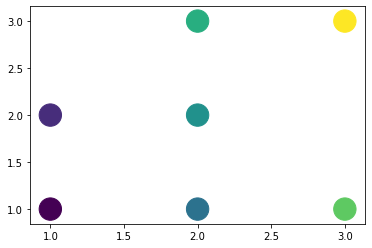

In [106]:
x = [1,1,2,2,2,3,3]
y = [1,2,1,2,3,1,3]
z = [1,2,4,5,6,7,9]

plt.scatter(x,y,c=z,s=500)

In [107]:
xs,xi=np.unique(x,return_inverse=True)
ys,yi=np.unique(y,return_inverse=True)
z=np.array(z)

Z=accum(np.array(list(zip(yi,xi))), z,func=None,size=None,fill_value=np.nan,dtype=float)
Z=np.flipud(Z)
X,Y=np.meshgrid(xs,np.flipud(ys))

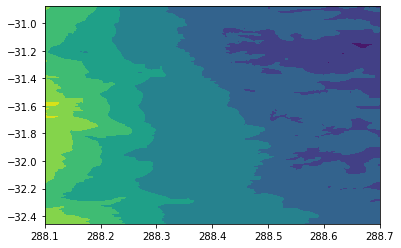

In [117]:
plt.contourf(X,Y,Z)

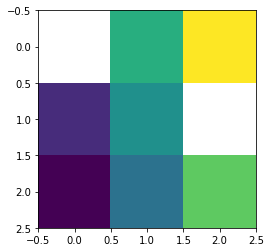

In [110]:
plt.imshow(Z)

In [99]:
X,Y=np.meshgrid(xs,np.flipud(ys))

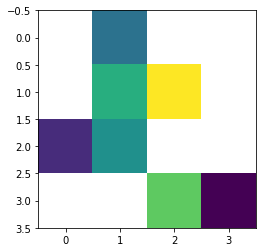

In [102]:
plt.imshow(Z)